### 1.) Load the data file using pandas :

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

### 2.) Checking for null values in dataset columnwise :

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3.) Dropping records with null values in any of the columns :

In [6]:
df=df.dropna()

In [7]:
df.shape

(9360, 13)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
# Now, lets drop the duplicate records if any, as it will not help in our analysis.

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(8886, 13)

### 4.) Fixing Variables which has incorrect type and inconsistent formatting : 

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 4(1). Fixing the Size column :

In [13]:
df.Size.value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
15M                    149
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [14]:
# As we can see, most of them are alphanumeric values and there is one item which is non-numeric.
# We are going to extract the numerical values and also convert the datatype to float to represent the data better.

In [15]:
def convert(Size):
    if 'M' in Size:
        X=Size[:-1]
        X=float(X)*1000
        return(X)
    elif 'k' in Size:
        X=Size[:-1]
        X=float(X)
        return(X)
    else:
        return None

In [16]:
df['Size']=df['Size'].map(convert)

In [17]:
# Now, we had changed the formatting for significant amount of numerical data.
# We also had changed the data type to float. 

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
# However, there are a couple of records that still says "Varies with device" for Size column.
# We are going to fix it by replacing those values with numerical data(preferably using pad function)
# Since we converted datatype to float, pad will look for Strings ("Varies with device") and replaces it with numeric values.
# It takes the values from previous record and applies it to the subsequent ones.

In [21]:
df.fillna(method='pad',inplace=True)

#### 4(2). Fixing the Reviews column :

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
# Reviews is currently an object which we need to convert to numeric datatype.
# Reviews cannot be in float. The most logical approach is to convert it to integer.

In [24]:
df['Reviews']=df['Reviews'].astype('int')

In [25]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 4(3). Fixing the Installs column :

In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
# Lets remove the symbols (+ and ,) in Installs column.

In [28]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')

C:\Users\USER\AppData\Local\Temp\ipykernel_3292\4283330324.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','')


In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
# Now, lets check the datatype for the column 'Installs'

In [31]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
# Lets convert the datatype to integer for Installs column

In [33]:
df.Installs=df.Installs.astype('int')

In [34]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 4(4). Fixing the Price column :

In [35]:
# Lets remove the symbol ($) in Price column.

In [36]:
df['Price']=df['Price'].str.replace('$','')

C:\Users\USER\AppData\Local\Temp\ipykernel_3292\3004727282.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [37]:
df.sample(15,random_state=165)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8660,"Clean My House – Chore To Do List, Task Scheduler",PRODUCTIVITY,4.1,661,3400.0,100000,Free,0,Everyone,Productivity,"June 21, 2018",2.1.2,4.1 and up
5036,NewTek NDI,PHOTOGRAPHY,3.5,77,1200.0,1000,Paid,19.99,Everyone,Photography,"October 26, 2016",1.1,4.1 and up
2490,My Cancer Coach,MEDICAL,4.3,44,34000.0,10000,Free,0,Everyone,Medical,"April 12, 2018",3.4.0.10,4.0.3 and up
9562,Weather 14 Days,WEATHER,4.4,279917,49000.0,10000000,Free,0,Everyone,Weather,"July 18, 2018",Varies with device,Varies with device
9397,eHub,BUSINESS,4.2,6969,4800.0,100000,Free,0,Everyone,Business,"June 29, 2018",3.9.11,4.4 and up
1721,Clash Royale,GAME,4.6,23134775,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
6783,Wifi BT Scanner,FAMILY,5.0,2,1200.0,500,Free,0,Everyone,Education,"November 3, 2016",1.0,4.0.3 and up
2191,Sago Mini Babies,FAMILY,4.5,253,83000.0,10000,Paid,3.99,Everyone,Education;Pretend Play,"October 28, 2016",1.1,4.0.3 and up
8312,Satellite Director,TOOLS,4.1,45610,176.0,10000000,Free,0,Everyone,Tools,"January 2, 2018",1.56,1.6 and up
2992,Hovercraft Racer,SPORTS,4.0,218,28000.0,100000,Free,0,Everyone,Sports,"July 19, 2018",5.0,4.1 and up


In [38]:
# As you can see in the above records, app Pricing doesn't have any $ symbols as we formatted it.

In [39]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [40]:
# Lets convert the datatype to float as Price might also be in decimals.

In [41]:
df.Price=df.Price.astype('float')

In [42]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 5.) Sanity checks:

#### 5(1).Checking the Average ratings(between 1 to 5) and dropping records outside this range :

In [43]:
# First of all, lets check if there are any records with Rating less than 1

In [44]:
df[df['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
# As you can see, we have Nil records for the above criteria. Lets see if any records exist with Ratings greater than 5.

In [46]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### 5(2).Checking for records where Reviews are more than Installs and dropping them :

In [47]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [48]:
df[df['Reviews']>df['Installs']].shape

(7, 13)

In [49]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [50]:
df[df['Reviews']>df['Installs']].shape

(0, 13)

In [51]:
# Now, we had successfully removed the records based on above parameters. Lets see the latest shape of our dataset.

In [52]:
df.shape

(8879, 13)

#### 5(3). Dropping rows of Free apps with Price >0 :

In [53]:
df[(df.Price>0)&(df.Type=='Free')]
    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [54]:
# As per the above, there isn't any records with Free apps with Price greater than 0.

### 6.) Performing Univariate Analysis and Outlier correction :

In [55]:
# For plot visualisations, lets import seaborn package.

In [56]:
import seaborn as sns

#### 6(1). Boxplot for Price :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

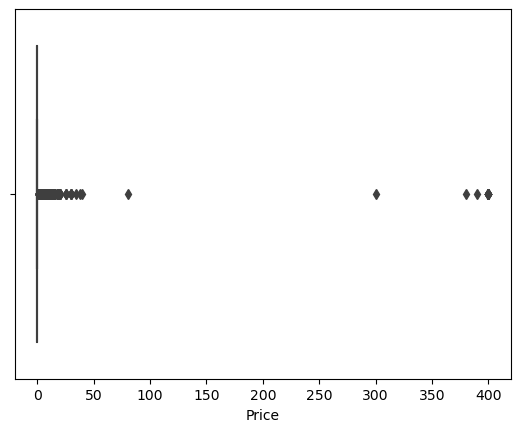

In [57]:
sns.boxplot(df['Price'])

In [58]:
# Interpretation :
# 1.) Most of the apps are priced between 0 to 50.
# 2.) There are few apps that are priced significantly higher and doesn't fit well to the group.
# 3.) As per the above chart, few apps are priced around 300 to 400 range and we can confirm that there are outliers.

#### 6(1). Outlier Correction - Boxplot for Price :

In [59]:
# As per the requirements, Lets Check the records of apps with Price greater than 200  and drop them

In [60]:
df[df.Price>=200].shape

(15, 13)

In [61]:
df.drop(df[df.Price>=200].index,inplace=True)

In [62]:
df.shape

(8864, 13)

In [63]:
# There were 15 records in total which we dropped as those seem to be junk apps.

#### Updated Boxplot for Price :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

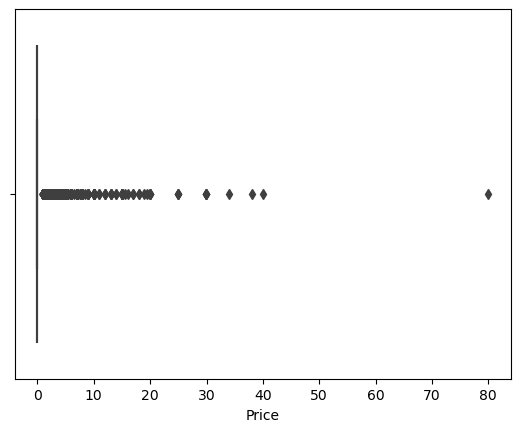

In [64]:
sns.boxplot(df['Price'])

#### 6(2). Boxplot for Reviews :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

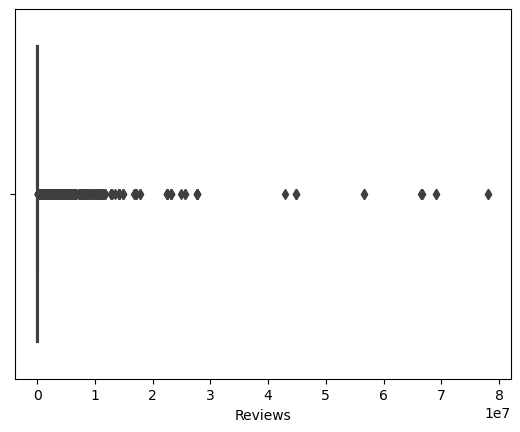

In [65]:
sns.boxplot(df['Reviews'])

In [66]:
# Interpretation :
# 1.) There are a couple of apps with very high number of reviews as per the above plot.
# 2.) Since the review counts for some apps are significantly higher, it can't be interpreted properly.
# 3.) Apps with Reviews more than 2 million are classified as star apps.
# 4.) Lets reduce the skew by dropping records with more than 2 million views.

#### 6(2). Outlier Correction - Boxplot for Reviews :

In [67]:
# As per the requirements, Lets Check the records of apps with Reviews greater than 2 million and drop them.

In [68]:
df[df.Reviews>2000000].shape

(408, 13)

In [69]:
df.drop(df[df.Reviews>=2000000].index,inplace=True)

In [70]:
df.shape

(8456, 13)

#### Updated Boxplot for Reviews :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

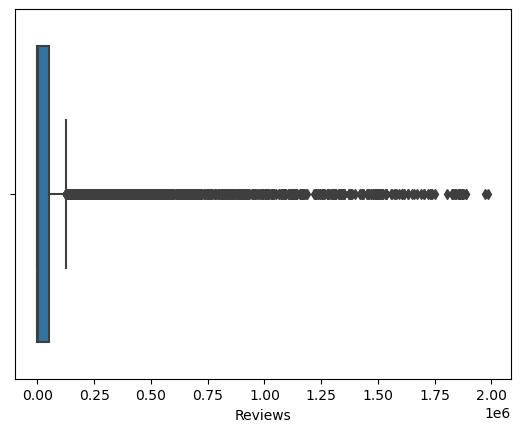

In [71]:
sns.boxplot(df['Reviews'])

#### 6(3). Histogram for Rating :

In [72]:
import matplotlib.pyplot as plt

(array([  17.,   18.,   40.,   73.,  131.,  442.,  842., 1546., 3608.,
        1739.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

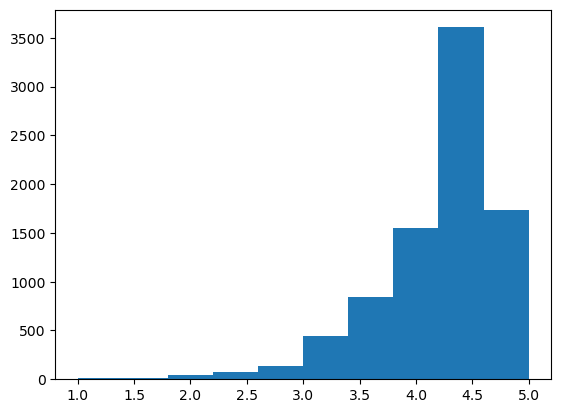

In [73]:
plt.hist(df.Rating)

In [74]:
df.groupby(['Rating']).Rating.value_counts()

Rating  Rating
1.0     1.0        16
1.2     1.2         1
1.4     1.4         3
1.5     1.5         3
1.6     1.6         4
1.7     1.7         8
1.8     1.8         8
1.9     1.9        12
2.0     2.0        12
2.1     2.1         8
2.2     2.2        14
2.3     2.3        20
2.4     2.4        19
2.5     2.5        20
2.6     2.6        24
2.7     2.7        23
2.8     2.8        40
2.9     2.9        44
3.0     3.0        82
3.1     3.1        69
3.2     3.2        63
3.3     3.3       101
3.4     3.4       127
3.5     3.5       156
3.6     3.6       167
3.7     3.7       231
3.8     3.8       288
3.9     3.9       372
4.0     4.0       525
4.1     4.1       649
4.2     4.2       871
4.3     4.3       948
4.4     4.4       914
4.5     4.5       875
4.6     4.6       690
4.7     4.7       472
4.8     4.8       225
4.9     4.9        87
5.0     5.0       265
Name: Rating, dtype: int64

In [75]:
# Interpretation :
# 1.) As per the Histogram, above, it seems most of the apps have ratings greater than 4.
# 2.) What we infer from this is - Distribution of data is more towards higher ratings.

#### 6(4). Histogram for Size :

Text(0.5, 0, 'Size')

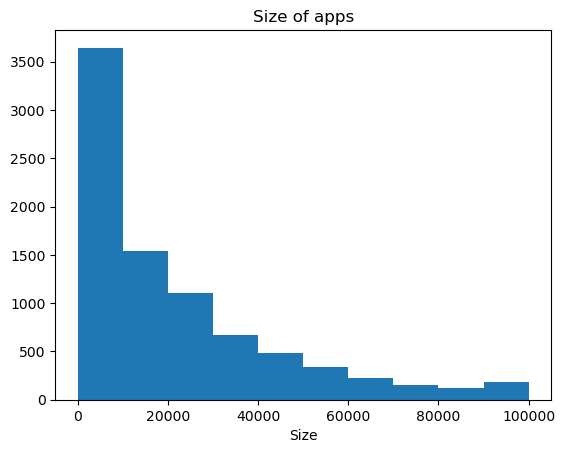

In [76]:
plt.hist(df.Size)
plt.title('Size of apps')
plt.xlabel('Size')

In [77]:
df.Size.value_counts()

14000.0    185
13000.0    184
12000.0    176
11000.0    174
15000.0    169
          ... 
412.0        1
459.0        1
478.0        1
782.0        1
619.0        1
Name: Size, Length: 410, dtype: int64

In [78]:
# Interpretation :
# Most of the apps had huge size and hence the data distribution is more towards the heavy apps.

#### 6(5). Boxplot and Outlier treatment for Installs :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

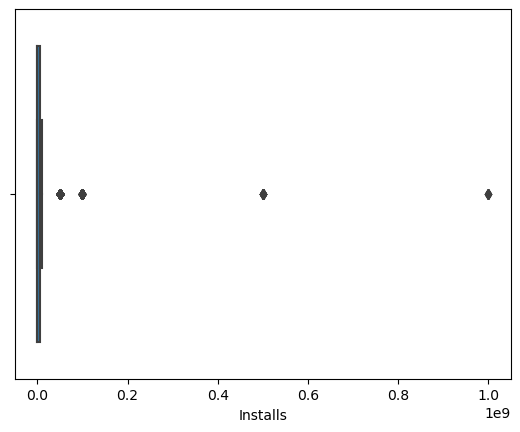

In [79]:
sns.boxplot(df['Installs'])

In [80]:
#Interpretation:
# 1.) Data is highly skewed in terms of Installation counts of the apps.
# 2.) Lets reduce the skew by finding the Outliers and dropping necessary records so that our data analysis looks user friendly.

#### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99 :

In [81]:
print( '10 percentile value is : ',df.Installs.quantile(0.10))
print( '25 percentile value is : ',df.Installs.quantile(0.25))
print( '50 percentile value is : ',df.Installs.quantile(0.50))
print( '70 percentile value is : ',df.Installs.quantile(0.70))
print( '90 percentile value is : ',df.Installs.quantile(0.90))
print( '95 percentile value is : ',df.Installs.quantile(0.95))
print( '99 percentile value is : ',df.Installs.quantile(0.99))

10 percentile value is :  1000.0
25 percentile value is :  10000.0
50 percentile value is :  100000.0
70 percentile value is :  1000000.0
90 percentile value is :  10000000.0
95 percentile value is :  10000000.0
99 percentile value is :  100000000.0


#### Deciding a threshold as cutoff for outlier and dropping records having values more than that :

In [82]:
# Lets consider 25 percentile value for Q1, 50 percentile for Q2, 75 percentile for Q3

In [83]:
Q1=df.Installs.quantile(0.25)
Q2=df.Installs.quantile(0.50)
Q3=df.Installs.quantile(0.75)

In [84]:
print('Q1 :',Q1)
print('Q2 :',Q2)
print('Q3 :',Q3)

Q1 : 10000.0
Q2 : 100000.0
Q3 : 5000000.0


In [85]:
# Now, lets find the Interquartile Range(IQR)

In [86]:
IQR=Q3-Q1

In [87]:
print('IQR Value is :',IQR)

IQR Value is : 4990000.0


In [88]:
val_high = Q3 + 1.5* IQR
val_low = Q1 - 1.5 *IQR

In [89]:
print('val_high is :',val_high)
print('val_low is :',val_low)

val_high is : 12485000.0
val_low is : -7475000.0


In [90]:
df[df.Installs>val_high].shape

(356, 13)

In [91]:
# Now, lets delete the 356 outlier records as those exceeds the threshold.

In [92]:
df.drop(df[df.Installs>val_high].index,inplace=True)

In [93]:
df[df.Installs>val_high].shape

(0, 13)

In [94]:
df.shape

(8100, 13)

In [95]:
# As you can see, we had successfully deleted the records as the current shape has 0 records for 13 columns.

#### Updated Boxplot for Installs :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

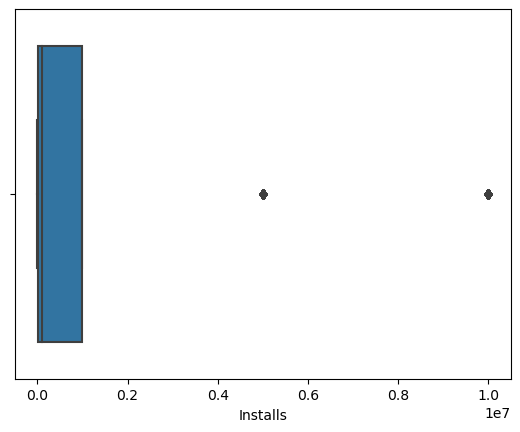

In [96]:
sns.boxplot(df['Installs'])

### 7.) Bivariate Analysis :

In [97]:
# Points to note :
# 1.) For Bivariate analysis, we are going to use a combo of 1 dependent variable and 1 independent variable while plotting.
# 2.) Here, since we are doing an app rating prediction analysis, our dependent variable is 'Rating'.
# 3.) Lets apply the plots with dependent variable 'Rating' against different independent variables to find their relationship.

#### 7(1). Scatter plot/joinplot for Rating vs. Price :

Text(0.5, 1.0, 'Rating vs Price')

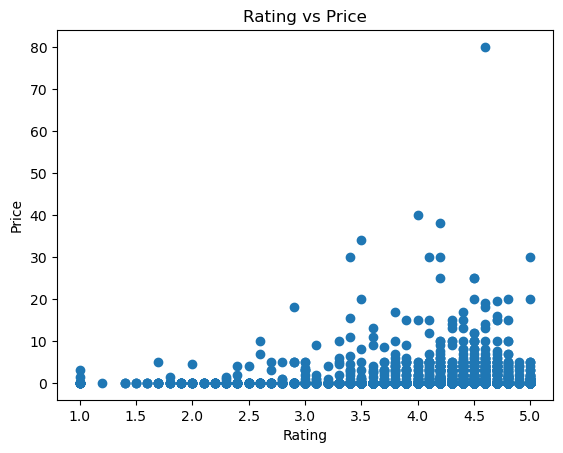

In [98]:
plt.scatter(df.Rating,df.Price)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')

In [99]:
# Interpretation :
# 1.) Apps with higher ratings(preferably above Rating 4) are priced higher.
# 2.) Apps that have lower to medium ratings are priced lower.
# 3.) Many of the apps in our dataset are of Type 'Free' (i.e Price as 0) and they are distributed across the Ratings.

#### 7(2). Scatter plot/joinplot for Rating vs. Size :

Text(0.5, 1.0, 'Rating vs Size')

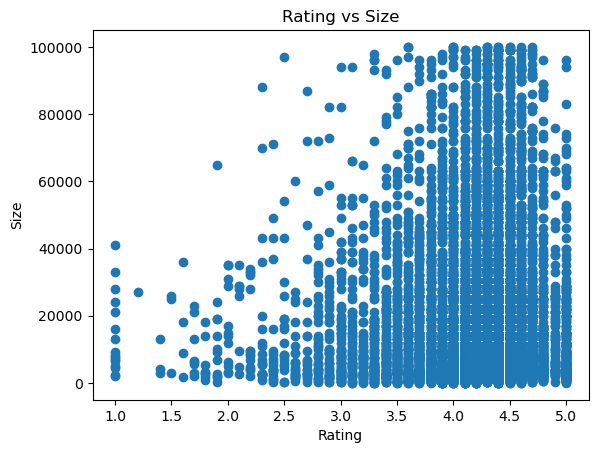

In [100]:
plt.scatter(df.Rating,df.Size)
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating vs Size')

In [101]:
# Interpretation :
# 1.) Most of the Apps with low ratings (preferably between 1 to 3) have lesser Size.
# 2.) When the Size of the app is greater, app Rating is also on the higher side.
# 3.) Apps with Ratings between this Range - 4 to 4.5 contains most of the apps with huge Sizes.

#### 7(3). Scatter plot/joinplot for Rating vs. Reviews :

Text(0.5, 1.0, 'Rating vs Reviews')

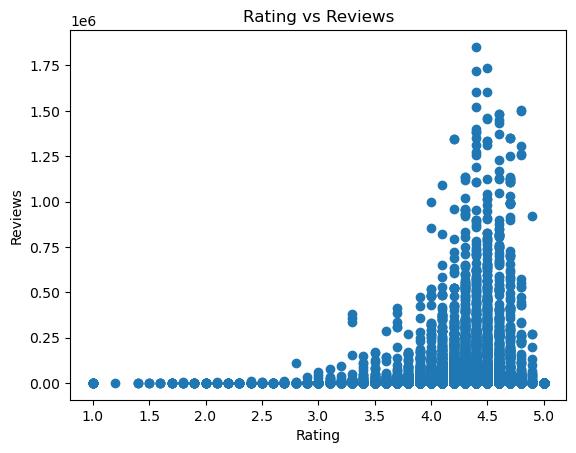

In [102]:
plt.scatter(df.Rating,df.Reviews)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating vs Reviews')

In [103]:
# Interpretation :
# 1.) More Reviews are for the apps Rated 4.4.
# 2.) Apps with very low reviews are for the ones with less rating (preferably below 3.5)

#### 7(4). Boxplot for Rating vs. Content Rating :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

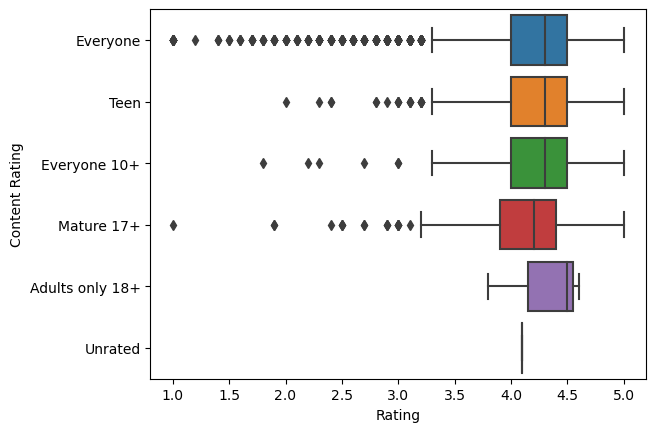

In [104]:
sns.boxplot(df['Rating'],df['Content Rating'])

In [105]:
# Interpretation:
# 1.) While most of the apps are Rated better (i.e 4 and above),Adults only 18+ genre has an edge in terms of Rating.
# 2.) Most of the app falls under Content Rating 'Everyone'.
# 3.) Apps with Content Rating 'Everyone' carries lot of records with very less ratings.
# 4.) Apps under Categories - 'Teen' and 'Everyone' have almost similar ratings and most of them are rated above 4.

#### 7(5). Boxplot for Ratings vs. Category :

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Rating')

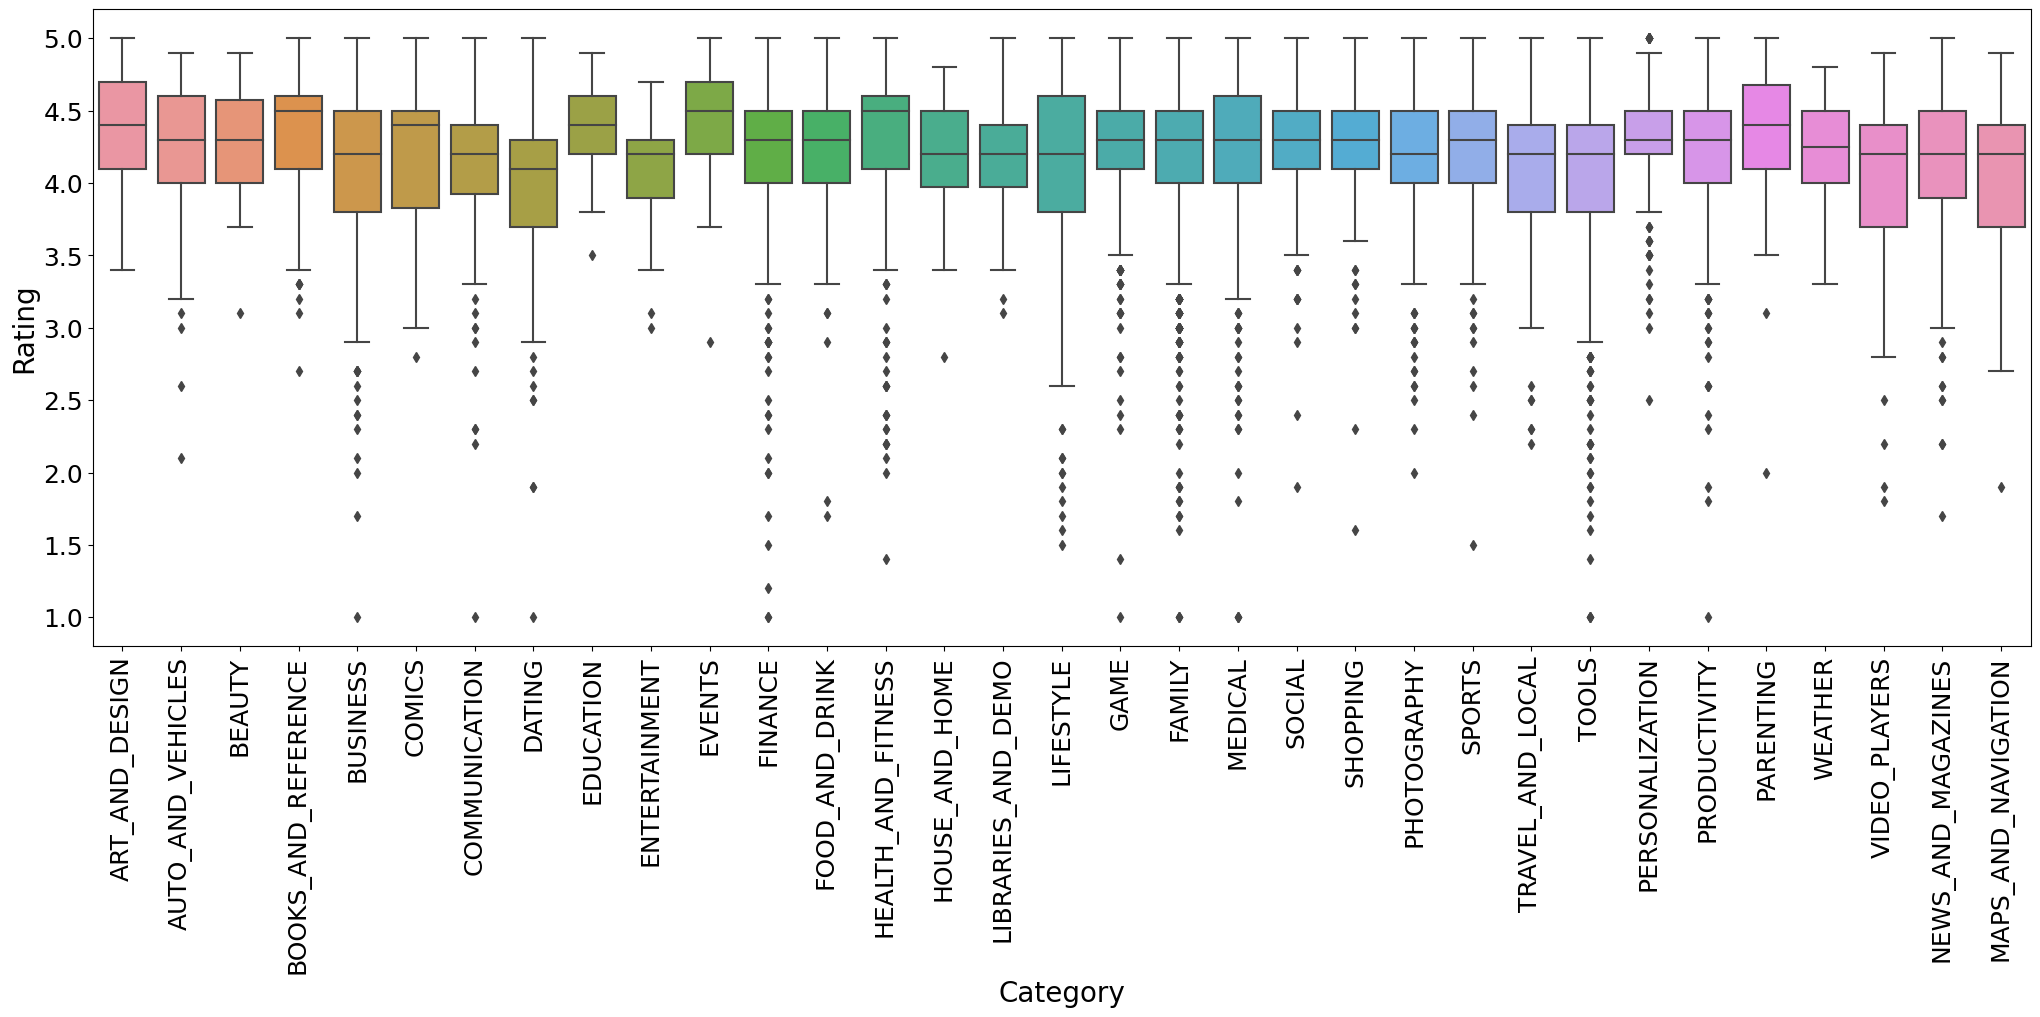

In [106]:
plt.figure(figsize=(25,8.27))
sns.boxplot(df.Category,df.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.yticks(fontsize=18)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Rating",fontsize=20)

In [107]:
# Interpretation :
# 1.) Apps with the following Categories - Health & Fitness, Books and Reference, Events carries highest median ratings.
# 2.) Most of the apps with low ratings are under the Categories - Finance,Family,Tools.
# 3.) App Categories such as 'Finance','Tools' and 'Family' carries more outliers as some apps are rated much lower.

### 8.) Data Preprocessing :

#### Create a copy of the dataframe to make all the edits. Name it inp1 :

In [108]:
inp1=df.copy()

In [109]:
inp1.shape

(8100, 13)

In [110]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [111]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### 8(1). Applying log transformation (np.log1p) to Reviews and Installs to reducing the skew :

In [112]:
# Since the numbers are very high, we are going to normalise the distributions by applying np.log1p

In [113]:
import numpy as np

#### Log transformation to Reviews :

In [114]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [115]:
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [116]:
# Now, that we applied (np.log1p) to skew the Reviews column, lets see the transformation in dataframe.

In [117]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

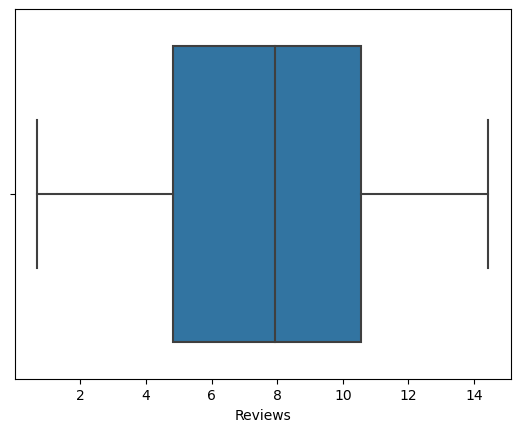

In [118]:
sns.boxplot(inp1['Reviews'])

#### Log transformation to Installs :

In [119]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [120]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [121]:
# Now, that we applied (np.log1p) to skew the Installs column, lets see the transformation in dataframe.

In [122]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

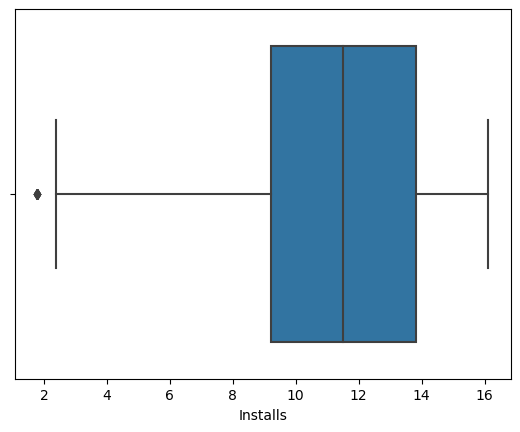

In [123]:
sns.boxplot(inp1['Installs'])

#### 8(2). Dropping the following Columns - App, Last Updated, Current Ver, and Android Ver :

In [124]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [125]:
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [126]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [127]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [128]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.00000
mean,4.170247,7.672137,21651.211667,11.610272,0.33001
std,0.539675,3.438909,22370.219980,3.455590,1.96117
min,1.000000,0.693147,8.500000,1.791759,0.00000
25%,4.000000,4.828314,5000.000000,9.210440,0.00000
50%,4.300000,7.936838,13000.000000,11.512935,0.00000
75%,4.500000,10.547096,30000.000000,13.815512,0.00000
max,5.000000,14.431985,100000.000000,16.118096,79.99000


In [129]:
# Interpretation :
# As per the dataset,
# 1.) Apps in Playstore scored a maximum of 5 stars as Ratings.
# 2.) Minimum Star for the apps in Playstore is 1.
# 3.) Average size of the apps are around 21651.211667
# 4.) Maximum price of Premium apps available in playstore is 79.99000 dollars.

#### Finding correlation :

In [130]:
inp1_correlation=inp1.corr()

In [131]:
inp1_correlation

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.176613,0.060902,0.074422,0.025085
Reviews,0.176613,1.000000,0.288970,0.947495,-0.101958
Size,0.060902,0.288970,1.000000,0.253061,-0.001120
Installs,0.074422,0.947495,0.253061,1.000000,-0.165756
Price,0.025085,-0.101958,-0.001120,-0.165756,1.000000


In [132]:
# Interpretation :
# 1.) Reviews,Size,Installs,Price carries positive correlation with Rating(dependent variable) but weak correlation strength. 
# 2.) Reviews and Installs are positively correlated with correlation strength being 'Very strong'.
# 3.) Prices have negative correlation with Reviews,Size and Installs.

#### 8(3).Dummy columns for Category, Genres, and Content Rating :

In [133]:
# Note:
# We add Dummy columns for Category, Genres, and Content Rating so that the data transforms to numerical data.
# This transformation is required so that it is in machine readable form which inturn will help us to train and test the data.
# We are going to transform the data using Onehot encoding.
# Before doing all of the above, lets find the unique values in those columns first.

In [134]:
inp2=inp1.copy()

In [135]:
inp2.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [136]:
inp2.shape

(8100, 9)

#### Finding Unique columns for Category :

In [137]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### Finding Unique columns for Genres :

In [138]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [139]:
inp2.Genres.value_counts().head(30)

Tools                      672
Entertainment              468
Education                  446
Finance                    306
Medical                    301
Lifestyle                  296
Personalization            289
Action                     277
Sports                     276
Productivity               276
Business                   261
Health & Fitness           257
Photography                238
Communication              238
News & Magazines           206
Social                     205
Travel & Local             188
Simulation                 184
Shopping                   178
Books & Reference          170
Dating                     159
Arcade                     149
Casual                     142
Video Players & Editors    133
Maps & Navigation          118
Food & Drink               106
Role Playing               103
Puzzle                      97
Strategy                    81
Auto & Vehicles             73
Name: Genres, dtype: int64

In [140]:
# Genres have too many unique values. Lets aim to reduce the columns based on the value counts.
# We do this so that there wont be many columns in the dataset and will help us bigtime during our analysis.
# Genres with lesser value counts will be consolidated and labelled as Column name - 'Other'.
# Genres with higher value counts will remain untouched.

In [141]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<50:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [142]:
# As per the above code, we had successfully lablelled the Genres as 'Other' for the ones with value counts less than 50.
# The transformed columns will be the below one.

In [143]:
inp2.Genres.value_counts()

Other                      755
Tools                      672
Entertainment              468
Education                  446
Finance                    306
Medical                    301
Lifestyle                  296
Personalization            289
Action                     277
Sports                     276
Productivity               276
Business                   261
Health & Fitness           257
Photography                238
Communication              238
News & Magazines           206
Social                     205
Travel & Local             188
Simulation                 184
Shopping                   178
Books & Reference          170
Dating                     159
Arcade                     149
Casual                     142
Video Players & Editors    133
Maps & Navigation          118
Food & Drink               106
Role Playing               103
Puzzle                      97
Strategy                    81
Auto & Vehicles             73
Adventure                   70
Weather 

#### Finding Unique columns for Content Rating :

In [144]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Creating dummy variables :

In [145]:
dummy_variables=pd.get_dummies(inp2[['Category','Type','Genres','Content Rating']])

In [146]:
# Above code creates a new dataframe with dummy columns and with numerical datatypes for the defined Variables.

#### Concatenating the files (inp2 and dummy variables) as one file :

In [147]:
inp2.drop(['Category','Type','Genres','Content Rating'], axis=1, inplace=True)

In [148]:
inp2=pd.concat([inp2,dummy_variables],axis=1)

In [149]:
inp2.shape

(8100, 84)

In [150]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### 9.) Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test :

In [151]:
# Before train, test and split, lets see if there are any null values in the dataset.
# Since we are training the model, we must ensure that the dataset is transformed to numerical values and that there is no null.

In [152]:
inp2.isnull().sum()

Rating                         0
Reviews                        0
Size                           0
Installs                       0
Price                          0
                              ..
Content Rating_Everyone        0
Content Rating_Everyone 10+    0
Content Rating_Mature 17+      0
Content Rating_Teen            0
Content Rating_Unrated         0
Length: 84, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
df_train,df_test=train_test_split(inp2,train_size=0.7,random_state=123)

In [155]:
# The above code assigns 70 percent data to df_train and 30 percent data to df_test.
# We passed inp2 because, that is the base from which data is being fetched, splitted and finally creating train and test sets.
# Below are the train and test data shapes FYI.

In [156]:
df_train.shape

(5670, 84)

In [157]:
df_test.shape

(2430, 84)

### 10.) Separate the dataframes into X_train, y_train, X_test, and y_test :

In [158]:
X_train = df_train.drop('Rating',axis=1)
y_train = df_train[['Rating']]
X_test = df_test.drop('Rating',axis=1)
y_test = df_test[['Rating']]

In [159]:
# Interpretation :
# We are basically creating 4 dataframes based on df_train and df_test sets.
# 1.) X_train - Rating column dropped from df_train dataset and dataset labelled as X_train.
# 2.) y_train - Rating column alone is included from df_train and dataset labelled as y_train.
# 3.) X_test - Rating column dropped from df_test dataset and dataset labelled as X_test
# 4.) y_test - Rating column alone is included from df_test and dataset labelled as y_test.

In [160]:
X_train

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
172,11.074638,6800.0,15.424949,0.00,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7810,10.179565,50.0,13.122365,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10195,10.144039,3200.0,13.815512,0.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2967,12.745223,6000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9816,12.729419,15000.0,16.118096,0.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,6.329721,37000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1811,10.389211,82000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4749,8.657824,4400.0,11.512935,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10051,4.934474,141.0,8.517393,4.99,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [161]:
y_train

,Rating
172,4.3
7810,4.4
10195,4.1
2967,4.2
9816,4.8
...,...
5514,2.7
1811,4.6
4749,4.7
10051,3.5


In [162]:
X_test

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
9678,12.148131,69000.0,13.815512,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2262,1.386294,23000.0,4.615121,2.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6347,6.863803,10000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7651,2.833213,21000.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1092,9.417761,21000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,11.857678,55000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5515,10.621352,2000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4625,6.964136,4500.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1570,11.990054,11000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [163]:
y_test

,Rating
9678,4.7
2262,5.0
6347,4.1
7651,3.5
1092,4.8
...,...
1382,4.4
5515,4.6
4625,4.5
1570,4.6


In [164]:
print('X_train shape is :',X_train.shape)
print('y_train shape is :',y_train.shape)

print('X_test shape is :',X_test.shape)
print('y_test shape is :',y_test.shape)

X_train shape is : (5670, 83)
y_train shape is : (5670, 1)
X_test shape is : (2430, 83)
y_test shape is : (2430, 1)


### 11.) Model building :

#### Using linear regression as the technique :

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lm=LinearRegression()

In [167]:
lm.fit(X_train,y_train)

LinearRegression()

### Prediction on Train data :

In [168]:
# Prediction value of Ratings based on Train data :
y_pred_train=lm.predict(X_train)

In [169]:
y_pred_train

array([[4.43669953],
       [4.35149165],
       [4.15435095],
       ...,
       [4.69975594],
       [3.98116779],
       [3.88100115]])

In [170]:
y_pred_train.shape

(5670, 1)

In [171]:
type(y_pred_train)

numpy.ndarray

In [172]:
# y_pred_train is nothing but the predicted value of Ratings based on train dataset.

#### Finding Error:

In [173]:
# Error=Prediction-Actual

In [174]:
Error_train_data=y_pred_train-y_train

In [175]:
# y_train contains the actual ratings whereas y_pred_train is the predicted ratings - for train dataset.

In [176]:
Error_train_data

,Rating
172,0.136700
7810,-0.048508
10195,0.054351
2967,0.114408
9816,-0.547199
...,...
5514,1.499297
1811,-0.177547
4749,-0.000244
10051,0.481168


In [177]:
# Lets rename the column name to Error_train_data as it shows the difference(Error) between actual and predicted values.

In [178]:
Error_train_data.columns=['Error_train_data']

In [179]:
Error_train_data

,Error_train_data
172,0.136700
7810,-0.048508
10195,0.054351
2967,0.114408
9816,-0.547199
...,...
5514,1.499297
1811,-0.177547
4749,-0.000244
10051,0.481168


In [180]:
# Lets load y_pred_train to the Dataframe so that we can perform a concat

In [181]:
y_pred_train=pd.DataFrame(y_pred_train,columns=['y_pred_train'])

In [182]:
y_pred_train

,y_pred_train
0,4.436700
1,4.351492
2,4.154351
3,4.314408
4,4.252801
...,...
5665,4.199297
5666,4.422453
5667,4.699756
5668,3.981168


In [183]:
X_train.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
172,11.074638,6800.0,15.424949,0.00,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7810,10.179565,50.0,13.122365,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10195,10.144039,3200.0,13.815512,0.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2967,12.745223,6000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9816,12.729419,15000.0,16.118096,0.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [184]:
y_train.head()

,Rating
172,4.3
7810,4.4
10195,4.1
2967,4.2
9816,4.8


In [185]:
y_pred_train.head()

,y_pred_train
0,4.436700
1,4.351492
2,4.154351
3,4.314408
4,4.252801


#### Concatenating the Files (X_train,y_train,y_pred_train,Error_train_data) :

In [186]:
# Lets remove the row labels and concat these files together. 

In [187]:
Train_data_predictions=pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True),y_pred_train.reset_index(drop=True),Error_train_data.reset_index(drop=True)],axis=1)

In [188]:
Train_data_predictions

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating,y_pred_train,Error_train_data
0,11.074638,6800.0,15.424949,0.00,0,0,0,1,0,0,...,0,0,1,0,0,0,0,4.3,4.436700,0.136700
1,10.179565,50.0,13.122365,1.99,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.4,4.351492,-0.048508
2,10.144039,3200.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.1,4.154351,0.054351
3,12.745223,6000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.2,4.314408,0.114408
4,12.729419,15000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.8,4.252801,-0.547199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,6.329721,37000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2.7,4.199297,1.499297
5666,10.389211,82000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.6,4.422453,-0.177547
5667,8.657824,4400.0,11.512935,0.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,4.7,4.699756,-0.000244
5668,4.934474,141.0,8.517393,4.99,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3.5,3.981168,0.481168


In [189]:
Train_data_predictions.to_csv('df_train.csv',index=False)

#### Finding Mean Squared Error (MSE) :

In [190]:
from sklearn.metrics import mean_squared_error

In [191]:
from math import sqrt

In [192]:
MSE = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',MSE)

Mean Squared Error : 0.2417437959023252


#### Finding Root Mean Square Error (RMSE) :

In [193]:
RMSE = sqrt(MSE)
print('Root Mean Squared Error :',RMSE)

Root Mean Squared Error : 0.49167448164647026


#### Finding R2 score :

In [194]:
from sklearn.metrics import r2_score

In [195]:
R2_train=r2_score(y_train,y_pred_train)
print('R2 score:',R2_train)

R2 score: 0.157924953510706


### Prediction on Test data :

In [196]:
# Prediction value of Ratings based on Test data : 
y_pred_test=lm.predict(X_test)

In [197]:
y_pred_test

array([[4.62579106],
       [4.15559468],
       [4.0213192 ],
       ...,
       [4.17732959],
       [4.21720202],
       [4.18662509]])

In [198]:
y_pred_test.shape

(2430, 1)

In [199]:
type(y_pred_test)

numpy.ndarray

In [200]:
# y_pred_test is nothing but the predicted value of Ratings for the test dataset.

#### Finding Error :

In [201]:
# Error=Prediction-Actual

In [202]:
Error_test_data=y_pred_test-y_test

In [203]:
# y_test contains the actual ratings whereas y_pred_test is the predicted ratings - for test dataset.

In [204]:
Error_test_data

,Rating
9678,-0.074209
2262,-0.844405
6347,-0.078681
7651,0.570654
1092,-0.305636
...,...
1382,-0.101755
5515,-0.094446
4625,-0.322670
1570,-0.382798


In [205]:
# Lets rename the column name to Error_test_data as it shows the difference (Error) between actual and predicted values.

In [206]:
Error_test_data.columns=['Error_test_data']

In [207]:
Error_test_data

,Error_test_data
9678,-0.074209
2262,-0.844405
6347,-0.078681
7651,0.570654
1092,-0.305636
...,...
1382,-0.101755
5515,-0.094446
4625,-0.322670
1570,-0.382798


In [208]:
# Lets load y_pred_test to the DataFrame so that we can perform a concat.

In [209]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['y_pred_test'])

In [210]:
y_pred_test

,y_pred_test
0,4.625791
1,4.155595
2,4.021319
3,4.070654
4,4.494364
...,...
2425,4.298245
2426,4.505554
2427,4.177330
2428,4.217202


In [211]:
X_test.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
9678,12.148131,69000.0,13.815512,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2262,1.386294,23000.0,4.615121,2.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6347,6.863803,10000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7651,2.833213,21000.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1092,9.417761,21000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [212]:
y_test.head()

,Rating
9678,4.7
2262,5.0
6347,4.1
7651,3.5
1092,4.8


In [213]:
y_pred_test.head()

,y_pred_test
0,4.625791
1,4.155595
2,4.021319
3,4.070654
4,4.494364


#### Concatenating the Files (X_test,y_test,y_pred_test,Error_test_data) :

In [214]:
# Lets remove the row labels and concat these files together.

In [215]:
Test_data_predictions=pd.concat([X_test.reset_index(drop=True),y_test.reset_index(drop=True),y_pred_test.reset_index(drop=True),Error_test_data.reset_index(drop=True)],axis=1)

In [216]:
Test_data_predictions

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating,y_pred_test,Error_test_data
0,12.148131,69000.0,13.815512,1.99,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.7,4.625791,-0.074209
1,1.386294,23000.0,4.615121,2.99,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5.0,4.155595,-0.844405
2,6.863803,10000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,4.1,4.021319,-0.078681
3,2.833213,21000.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3.5,4.070654,0.570654
4,9.417761,21000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.8,4.494364,-0.305636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,11.857678,55000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.4,4.298245,-0.101755
2426,10.621352,2000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.6,4.505554,-0.094446
2427,6.964136,4500.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4.5,4.177330,-0.322670
2428,11.990054,11000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4.6,4.217202,-0.382798


In [217]:
Test_data_predictions.to_csv('df_test.csv',index=False)

#### Finding Mean Squared Error (MSE) :

In [218]:
from sklearn.metrics import mean_squared_error

In [219]:
from math import sqrt

In [220]:
MSE = mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',MSE)

Mean Squared Error : 0.2642785028040395


#### Finding Root Mean Squared Error (RMSE) :

In [221]:
RMSE = sqrt(MSE)
print('Root Mean Squared Error :',RMSE)

Root Mean Squared Error : 0.5140802493813972


#### Finding R2 score :

In [222]:
from sklearn.metrics import r2_score

In [223]:
R2_test=r2_score(y_test,y_pred_test)
print('R2 score:',R2_test)

R2 score: 0.12132814370814249
